Import Libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read and Print dataset details

In [50]:
bankdata =  pd.read_csv("bill_authentication.csv")
bankdata.shape 
print(bankdata.head())


   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


Divide data 

In [51]:
X=bankdata.drop('Class', axis=1)
y=bankdata['Class']

Split train test dataset

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


train SV model

In [53]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

Prediction

In [54]:
y_pred = svclassifier.predict(X_test)
print(y_pred)

[0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0
 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0
 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0]


Evaluation

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
conf=confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))

[[143   1]
 [  3 128]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       144
           1       0.99      0.98      0.98       131

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



Visualization of confusion matrix

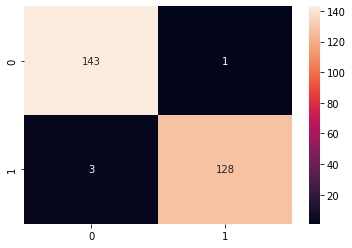

In [56]:
import seaborn as sns
sns.heatmap(conf, annot=True,fmt='d')


HyperPlane Visualization with IRIS data

In [34]:
from sklearn.svm import LinearSVC

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [35]:
# Load data with only two classes and two features
iris = datasets.load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]

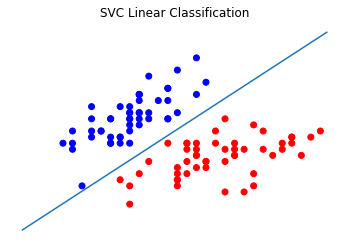

In [39]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Create support vector classifier
svc = LinearSVC(C=1.0)

# Train model
model = svc.fit(X_std, y)
# Plot data points and color using their class
color = ['blue' if c == 0 else 'red' for c in y]
plt.scatter(X_std[:,0], X_std[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.title('SVC Linear Classification')
plt.axis("off"), plt.show();
